---
### Proyecto Retail 
### Fase 3: Procesamiento de Datos y entrenamiento del modelo
### Por: Equipo 5 (Luis Hermenegildo, Edgar Correa, Miguel Avila)
### Objetivo: Predecir el precio de un producto
---

---
#### Carga de librerias
---

In [31]:
#Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import hasNullData
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import time 
from sklearn.model_selection import learning_curve


---
#### Lectura de archivo y carga exploración de datos
---

In [4]:
# Cargar los datos
df = pd.read_csv('../data/OnlineRetail_clean.csv', encoding='ISO-8859-1')
# Mostrar las primeras filas
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,Year,Month,Day,Hour,DayOfWeek
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


---
#### Establecimiento de tipos de datos
---

In [5]:
# Convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,Year,Month,Day,Hour,DayOfWeek
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


---
#### Selección de variables
---

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSpent', 'Year', 'Month',
       'Day', 'Hour', 'DayOfWeek'],
      dtype='object')

---
#### TOP Productos más vendidos
* 85123A
* 22423
* 85099B
* 47566
* 84879
* 20725
* 22720
* POST
* 22197
* 23203
---

In [8]:
#Conservamos solo las ventas sin importar las devoluciones
df_model = df[df['Quantity'] > 0]
#Conservamos solo las ventas sin ofertas y promociones
df_model = df_model[df_model['UnitPrice'] > 0]
#Conservamos solo el cliente que tiene mayor presencia
df_model = df_model[df_model['Country'] == 'United Kingdom']
#Conservamos solo el cliente que tiene mayor presencia
df_model = df_model[df_model['StockCode'].isin(['85123A']) ]
#Quitamos columnas inecesarias
df_model = df_model.drop(columns=['InvoiceNo','Country', 'Description', 'InvoiceDate'])

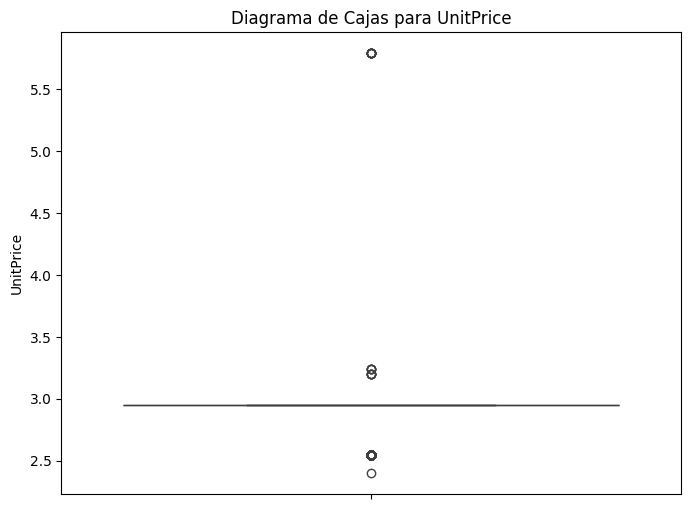

In [9]:
df_clean = df_model[df_model['UnitPrice'] > 0]

# Generamos el diagrama de cajas para 'UnitPrice'
plt.figure(figsize=(8, 6))
sns.boxplot(y='UnitPrice', data=df_clean)

# Añadir título y etiquetas
plt.title('Diagrama de Cajas para UnitPrice')
plt.ylabel('UnitPrice')

# Mostrar el gráfico
plt.show()

In [10]:
df_model.head()

,StockCode,Quantity,UnitPrice,CustomerID,TotalSpent,Year,Month,Day,Hour,DayOfWeek
0,85123A,6,2.55,17850.0,15.3,2010,12,1,8,2
49,85123A,6,2.55,17850.0,15.3,2010,12,1,9,2
66,85123A,6,2.55,17850.0,15.3,2010,12,1,9,2
220,85123A,64,2.55,17511.0,163.2,2010,12,1,10,2
262,85123A,32,2.55,13408.0,81.6,2010,12,1,10,2


In [11]:
#Verificar que no existan valores nulos
df_model.isnull().sum()

# En caso de existir optar por el borrado
#df_model = df_model.dropna() 
# O rellenar
#df_model.fillna(df_model.mean(), inplace=True)


StockCode     0
Quantity      0
UnitPrice     0
CustomerID    0
TotalSpent    0
Year          0
Month         0
Day           0
Hour          0
DayOfWeek     0
dtype: int64

In [12]:
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', StandardScaler(), numeric_features),
#        ('cat', OneHotEncoder(), categorical_features)
#    ])

# Definir columnas
numeric_features = ['Quantity']
temporary_features = ['Year', 'Month', 'Day', 'DayOfWeek']
categorical_features = ['StockCode']

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                ('escalaNum', MinMaxScaler(feature_range=(1,2)))])

# Transformaciones one-hot-encoder en algunas de las categóricas:
cat_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])

In [14]:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, numeric_features)
                                                        ],
                                        remainder='passthrough')

In [15]:
columnasTransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numpipe',
                                 Pipeline(steps=[('impMediana',
                                                  SimpleImputer(strategy='median')),
                                                 ('escalaNum',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2)))]),
                                 ['Quantity'])])

In [16]:
df_model.columns

Index(['StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'TotalSpent',
       'Year', 'Month', 'Day', 'Hour', 'DayOfWeek'],
      dtype='object')

In [17]:
# Selecciona las columnas de características y la columna objetivo (UnitPrice)
X = df_model[['Year', 'Month', 'Day', 'DayOfWeek']]  # Características
y = df_model['Quantity']  # Precio a predecir

#X = columnasTransformer.fit_transform(X)



In [ ]:
def plot_learning_curve(estimator, X, y, title):
    """Genera una curva de aprendizaje para un estimador dado."""
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, 
                                                            scoring='neg_mean_squared_error',
                                                            n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10), 
                                                            random_state=42)

    # Calcular promedios y desviaciones estándar
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Negative MSE")
    
    # Graficar la curva de aprendizaje
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [39]:
def regression_gridsearch(X, y, metric='mse'):
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definir los tres modelos de regresión
    models = {
        'Linear Regression': LinearRegression(),
        'Support Vector Regressor': SVR(),
        'Random Forest Regressor': RandomForestRegressor()
    }
    
    # Definir los hiperparámetros a probar para cada modelo
    param_grids = {
        'Linear Regression': {
            'fit_intercept': [True, False]
        },
        'Support Vector Regressor': {
            'kernel': ['linear', 'rbf'],  
            'C': [0.01, 0.1, 1],          # Reducir rango de C
            'epsilon': [0.1, 0.01],       # Añadir epsilon para reducir errores pequeños
            'gamma': ['scale']
        },
        'Random Forest Regressor': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    }
    
    best_models = {}
    model_scores = {}
    
    # Iterar sobre cada modelo y realizar el GridSearchCV
    for model_name in models:
        print(f"Running GridSearchCV for {model_name}...")
        
        model = models[model_name]
        param_grid = param_grids[model_name]

        # Medir el tiempo de inicio
        start_time = time.time()
        
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Medir el tiempo de finalización
        end_time = time.time()
        
        # Calcular la duración en segundos
        duration = end_time - start_time
        
        # Guardar los mejores parámetros y el mejor modelo
        best_models[model_name] = grid_search.best_estimator_
        
        # Hacer predicciones en el conjunto de prueba
        y_pred = grid_search.predict(X_test)
        
        # Calcular el error (MSE) en el conjunto de prueba
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        model_scores[model_name] = {'mse': mse, 'r2': r2, 'mae': mae}

        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Test MSE for {model_name}: {mse}")
        print(f"Test R-squared for {model_name}: {r2}")
        print(f"Test Mean Absolute Error for {model_name}: {mae}")
        print(f"Training time for {model_name}: {duration:.2f} seconds")
        print('---')
        # Generar la curva de aprendizaje
        plot_learning_curve(best_models[model_name], X, y, f"Learning Curve: {model_name}")
        
    # Comparar los modelos según la métrica especificada
    if metric == 'mse':
        best_model = min(model_scores, key=lambda x: model_scores[x]['mse'])
    elif metric == 'r2':
        best_model = max(model_scores, key=lambda x: model_scores[x]['r2'])
    elif metric == 'mae':
        best_model = min(model_scores, key=lambda x: model_scores[x]['mae'])
    else:
        raise ValueError(f"Métrica '{metric}' no válida. Usa 'mse', 'r2' o 'mae'.")
    
    print(f"El mejor modelo según {metric.upper()} es {best_model}")
    print(f"Métricas del mejor modelo: {model_scores[best_model]}")
    
    return best_models[best_model], model_scores[best_model]


Running GridSearchCV for Linear Regression...
Best parameters for Linear Regression: {'fit_intercept': False}
Test MSE for Linear Regression: 10958.827943795197
Test R-squared for Linear Regression: 0.0026931850361574527
Test Mean Absolute Error for Linear Regression: 21.852998330750076
Training time for Linear Regression: 0.11 seconds
---


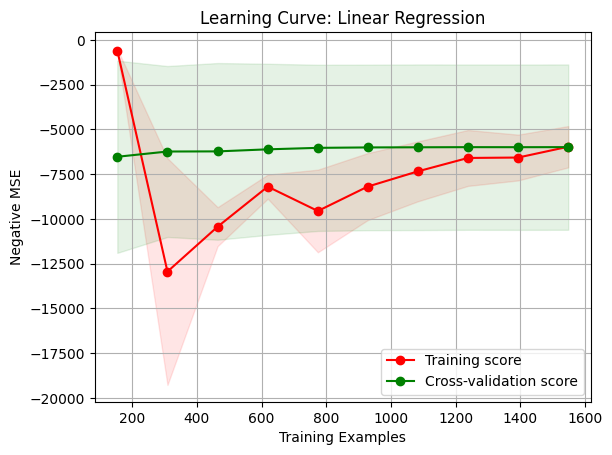

Running GridSearchCV for Support Vector Regressor...
Best parameters for Support Vector Regressor: {'C': 0.01, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Test MSE for Support Vector Regressor: 11188.20706063358
Test R-squared for Support Vector Regressor: -0.01818143381966908
Test Mean Absolute Error for Support Vector Regressor: 16.662368828899712
Training time for Support Vector Regressor: 12.33 seconds
---


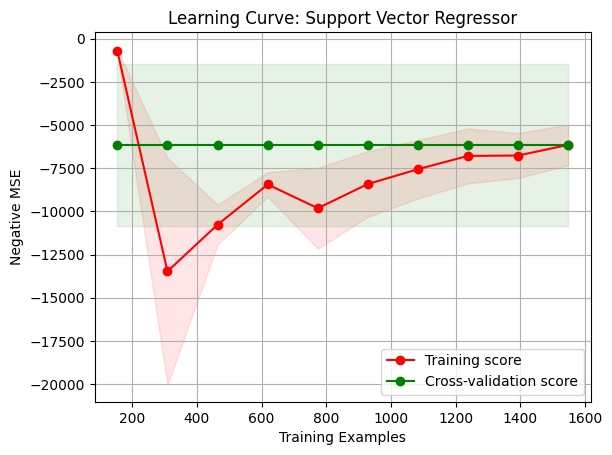

Running GridSearchCV for Random Forest Regressor...
Best parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Test MSE for Random Forest Regressor: 12462.234746287862
Test R-squared for Random Forest Regressor: -0.1341241696553046
Test Mean Absolute Error for Random Forest Regressor: 25.161122166459705
Training time for Random Forest Regressor: 48.15 seconds
---


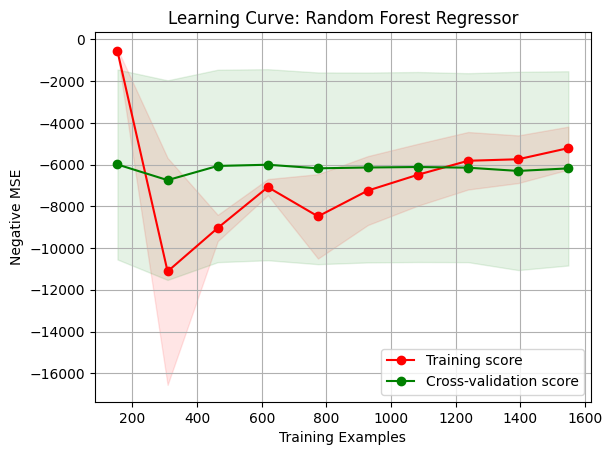

El mejor modelo según MSE es Linear Regression
Métricas del mejor modelo: {'mse': np.float64(10958.827943795197), 'r2': 0.0026931850361574527, 'mae': np.float64(21.852998330750076)}


In [40]:
mejor_modelo, metricas_mejor_modelo = regression_gridsearch(X, y, metric='mse')

In [28]:

def regression_randomsearch(X, y, metric='mse'):
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definir los tres modelos de regresión
    models = {
        'Linear Regression': LinearRegression(),
        'Support Vector Regressor': SVR(),
        'Random Forest Regressor': RandomForestRegressor()
    }
    
    # Definir los hiperparámetros a probar para cada modelo
    param_grids = {
        'Linear Regression': {
            'fit_intercept': [True, False]
        },
        'Support Vector Regressor': {
            'kernel': ['linear', 'rbf'],  
            'C': np.logspace(-2, 0, 10),  
            'epsilon': [0.1, 0.01],
            'gamma': ['scale']
        },
        'Random Forest Regressor': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    }
    
    best_models = {}
    model_scores = {}
    
    # Iterar sobre cada modelo y realizar el RandomizedSearchCV
    for model_name in models:
        print(f"Running RandomizedSearchCV for {model_name}...")
        
        model = models[model_name]
        param_grid = param_grids[model_name]

        start_time = time.time()
        
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, 
                                        scoring='neg_mean_squared_error', n_jobs=-1, 
                                        n_iter=10, random_state=42)
        random_search.fit(X_train, y_train)

        end_time = time.time()
        duration = end_time - start_time
        
        best_models[model_name] = random_search.best_estimator_
        y_pred = random_search.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Almacenar las métricas para comparación posterior
        model_scores[model_name] = {'mse': mse, 'r2': r2, 'mae': mae}
        
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Test MSE for {model_name}: {mse}")
        print(f"Test R-squared for {model_name}: {r2}")
        print(f"Test Mean Absolute Error for {model_name}: {mae}")
        print(f"Training time for {model_name}: {duration:.2f} seconds")
        print('---')
        
        # Generar la curva de aprendizaje
        plot_learning_curve(best_models[model_name], X, y, f"Learning Curve: {model_name}")

    # Comparar los modelos según la métrica especificada
    if metric == 'mse':
        best_model = min(model_scores, key=lambda x: model_scores[x]['mse'])
    elif metric == 'r2':
        best_model = max(model_scores, key=lambda x: model_scores[x]['r2'])
    elif metric == 'mae':
        best_model = min(model_scores, key=lambda x: model_scores[x]['mae'])
    else:
        raise ValueError(f"Métrica '{metric}' no válida. Usa 'mse', 'r2' o 'mae'.")
    
    print(f"El mejor modelo según {metric.upper()} es {best_model}")
    print(f"Métricas del mejor modelo: {model_scores[best_model]}")
    
    return best_models[best_model], model_scores[best_model]


Running RandomizedSearchCV for Linear Regression...


d:\Documents\Luis\ITESM\Bootcamp\wizeline_2024_equipo_5\.venvWizeLine\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Linear Regression: {'fit_intercept': False}
Test MSE for Linear Regression: 10958.827943795197
Test R-squared for Linear Regression: 0.0026931850361574527
Test Mean Absolute Error for Linear Regression: 21.852998330750076
Training time for Linear Regression: 5.37 seconds
---


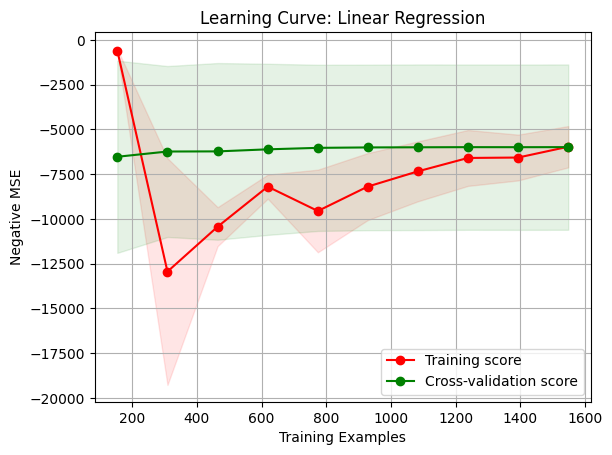

Running RandomizedSearchCV for Support Vector Regressor...
Best parameters for Support Vector Regressor: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': np.float64(1.0)}
Test MSE for Support Vector Regressor: 11188.22224968194
Test R-squared for Support Vector Regressor: -0.01818281609718264
Test Mean Absolute Error for Support Vector Regressor: 16.662140621929908
Training time for Support Vector Regressor: 2.01 seconds
---


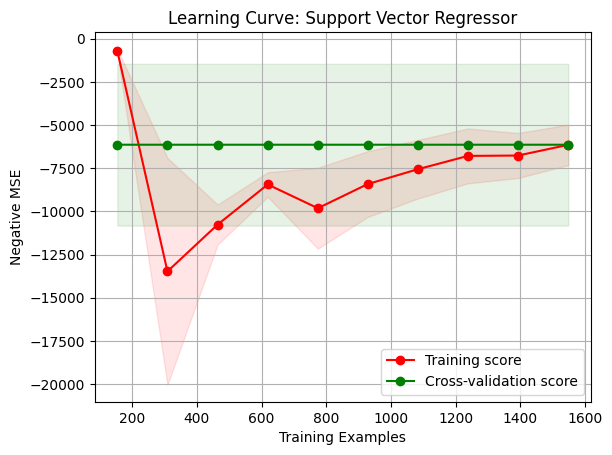

Running RandomizedSearchCV for Random Forest Regressor...
Best parameters for Random Forest Regressor: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}
Test MSE for Random Forest Regressor: 12440.80499837729
Test R-squared for Random Forest Regressor: -0.13217395803196474
Test Mean Absolute Error for Random Forest Regressor: 25.054372936855998
Training time for Random Forest Regressor: 10.37 seconds
---


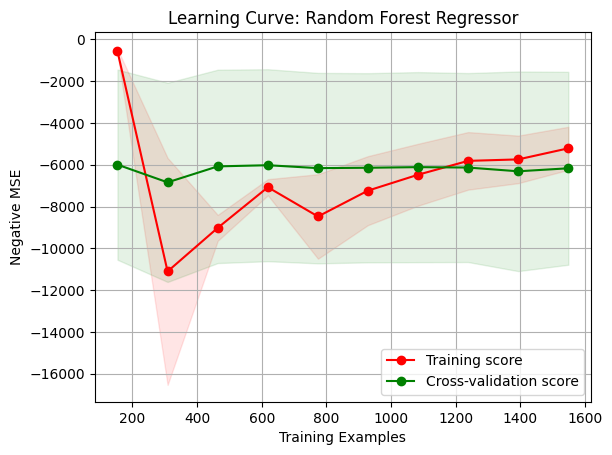

El mejor modelo según MSE es Linear Regression
Métricas del mejor modelo: {'mse': np.float64(10958.827943795197), 'r2': 0.0026931850361574527, 'mae': np.float64(21.852998330750076)}


In [29]:
mejor_modelo, metricas_mejor_modelo = regression_randomsearch(X, y, metric='mse')